<a href="https://colab.research.google.com/github/marco-milanesi/FlybackConverter-FPGA-based-Digital-Twin/blob/main/Classifier/FaultClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Test dataset

In [30]:
import os
import pandas as pd
import numpy as np
import statistics
import glob
from numpy import mean, absolute
from natsort import natsorted

# Training Dataset

In [31]:
import pandas as pd
import numpy as np

# Read the CSV file into a Pandas DataFrame
df_test = pd.read_csv('Fault_train_dataset.csv')
df_test

,fault type,input voltage,mean voltage,maximum voltage,range voltage,variance voltage,median voltage,First Quartile Voltage,Third Quartile Voltage,Absolute Mean Deviation Voltage,Mean Absolute Local Derivative Voltage
0,1,0.9,0.225833,0.9,0.9,0.150416,0.0,0.0,0.35,0.335417,0.022689
1,1,1.4,0.470455,1.4,1.4,0.433294,0.0,0.0,1.40,0.619697,0.010687
2,1,1.9,0.786154,1.9,1.9,0.859501,0.0,0.0,1.90,0.909964,0.027132
3,1,2.4,0.860959,2.4,2.4,1.311695,0.0,0.0,2.40,1.094933,0.017931
4,1,2.9,1.479375,2.9,2.9,2.080637,2.9,0.0,2.90,1.438383,0.018239
5,1,3.4,1.409396,3.6,3.6,2.779241,0.0,0.0,3.40,1.637818,0.028378
6,1,3.9,1.777027,4.9,4.9,3.734743,0.0,0.0,3.90,1.911651,0.094558
7,2,0.9,0.688554,0.9,0.3,0.018724,0.6,0.6,0.90,0.124829,0.001818
8,2,1.4,0.824375,1.4,0.9,0.129718,0.6,0.6,1.40,0.323789,0.006289
9,2,1.9,0.918713,1.9,1.4,0.313568,0.6,0.6,0.60,0.482035,0.008824


## Test Dataset

In [33]:
# Read the CSV file into a Pandas DataFrame
train_df = pd.read_csv('fault_datasetNew.csv')
train_df.drop('derivative of MV', axis=1, inplace=True)
train_df

,fault type,input voltage,mean voltage,maximum voltage,range voltage,variance voltage,median voltage,First Quartile voltage,Third Quartile voltage,Absolute Mean Deviation voltage,Absolute Local Derivative voltage
0,1,1.0,0.393095,1.005493,1.005492,0.229617,0.000942,0.000001,0.998249,0.463991,0.000037
1,1,1.1,0.432389,1.106697,1.106696,0.277833,0.001036,0.000001,1.098081,0.510384,0.000040
2,1,1.2,0.471692,1.207526,1.207525,0.330643,0.001129,0.000001,1.197904,0.556780,0.000044
3,1,1.3,0.511026,1.307317,1.307316,0.388051,0.001225,0.000001,1.297733,0.603188,0.000047
4,1,1.4,0.550360,1.408154,1.408152,0.450061,0.001320,0.000001,1.397575,0.649601,0.000051
5,1,1.5,0.589638,1.508623,1.508622,0.516639,0.001413,0.000001,1.497401,0.695986,0.000054
6,1,1.6,0.628701,1.609243,1.609242,0.587347,0.001507,0.000001,1.596577,0.742088,0.000057
7,1,1.7,0.668230,1.709593,1.709592,0.663579,0.001600,0.000001,1.697048,0.788770,0.000061
8,1,1.8,0.707511,1.810225,1.810223,0.743925,0.001693,0.000001,1.796868,0.835154,0.000064
9,1,1.9,0.746769,1.909527,1.909526,0.828874,0.001784,0.000001,1.896715,0.881536,0.000068


## Train test and split

In [34]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

testLabels = df_test.values[:,0]
testSamples = df_test.values[:,1:]

trainLabels = train_df.values[:,0]
trainSamples = train_df.values[:,1:]

from collections import Counter
print("Labels distribution:",Counter(trainLabels))

# train-test split
#trainSamples, testSamples, trainLabels, testLabels = sklearn.model_selection.train_test_split(samples, labels, random_state=10,stratify=labels,train_size=0.6)
print("Train labels distribution:", Counter(trainLabels))
print("Test labels distribution:",Counter(testLabels))

Labels distribution: Counter({1.0: 11, 2.0: 11})
Train labels distribution: Counter({1.0: 11, 2.0: 11})
Test labels distribution: Counter({1.0: 7, 2.0: 7})


# Classification Models

## KN Neighbors

In [35]:
model_kn = KNeighborsClassifier() # Create the model
model_kn.fit(trainSamples, trainLabels) #train the model
from sklearn.metrics import  accuracy_score,cohen_kappa_score
modelResults_kn = model_kn.predict(testSamples)

## SVM

In [36]:
from sklearn import svm # Import Support Vector Machine Classifier
model_svm = svm.SVC() # Create the model
model_svm.fit(trainSamples, trainLabels) #train the model
modelResults_svm = model_svm.predict(testSamples)

## Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
clf = DecisionTreeClassifier() # Create the model
clf = clf.fit(trainSamples, trainLabels) #train the model
modelResults_clf = clf.predict(testSamples)

## Gradient Boosting Classifier

In [38]:
from sklearn.ensemble import GradientBoostingClassifier # Import Gradient Boosting Classifier
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=12, max_depth=2, random_state=10)
gb_clf2.fit(trainSamples, trainLabels)
modelResults_gbc = gb_clf2.predict(testSamples)

## Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression with a higher number of iterations
logreg = LogisticRegression(max_iter=1000)  # Adjust the number as needed

# Fit the model
logreg.fit(trainSamples, trainLabels)

# Predict using the trained model
modelResults_logreg = logreg.predict(testSamples)


## Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(trainSamples, trainLabels)
modelResults_nb = nb.predict(testSamples)

# Models Evaluation

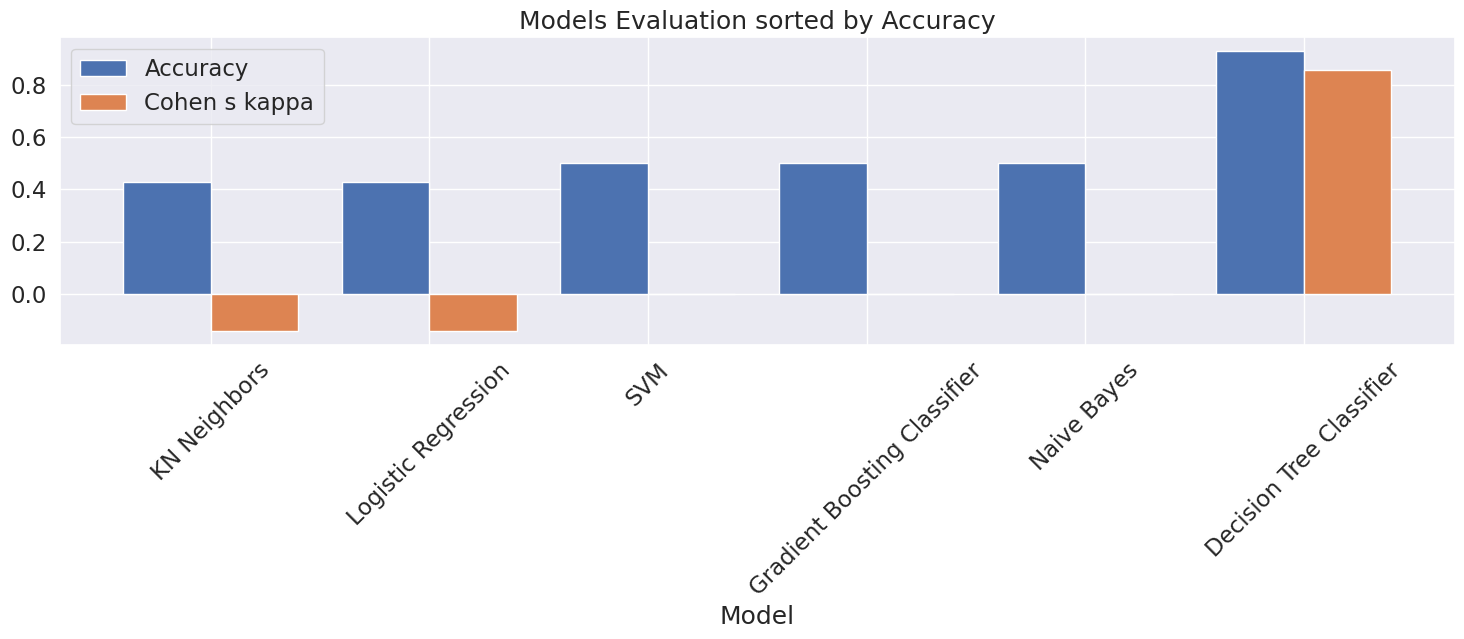

In [41]:
import matplotlib.pyplot as plt
import numpy as np

data = {
    'KN Neighbors': [accuracy_score(testLabels, modelResults_kn), cohen_kappa_score(testLabels, modelResults_kn)],
    'SVM': [accuracy_score(testLabels, modelResults_svm), cohen_kappa_score(testLabels, modelResults_svm)],
    'Decision Tree Classifier': [accuracy_score(testLabels, modelResults_clf), cohen_kappa_score(testLabels, modelResults_clf)],
    'Gradient Boosting Classifier': [accuracy_score(testLabels, modelResults_gbc), cohen_kappa_score(testLabels, modelResults_gbc)],
    'Logistic Regression': [accuracy_score(testLabels, modelResults_logreg), cohen_kappa_score(testLabels, modelResults_logreg)],
    'Naive Bayes': [accuracy_score(testLabels, modelResults_nb), cohen_kappa_score(testLabels, modelResults_nb)]
}

data = dict(sorted(data.items(), key=lambda item: item[1]))
names = list(data.keys())
accuracy_values = [x[0] for x in data.values()]
cohenskappa_values = [x[1] for x in data.values()]

plt.figure(figsize=(18,4))
X_axis = np.arange(len(names))
plt.bar(X_axis - 0.2, accuracy_values, 0.4, label='Accuracy')
plt.bar(X_axis + 0.2, cohenskappa_values, 0.4, label='Cohen s kappa')

plt.xticks(X_axis, names, rotation=45)
plt.xlabel("Model")
plt.title("Models Evaluation sorted by Accuracy")
plt.legend()
plt.show()

In [42]:
accuracy_values

[0.42857142857142855, 0.42857142857142855, 0.5, 0.5, 0.5, 0.9285714285714286]

In [43]:
cohenskappa_values

[-0.1428571428571428, -0.1428571428571428, 0.0, 0.0, 0.0, 0.8571428571428572]

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
cf_matrix = confusion_matrix(testLabels, modelResults_clf)
print(classification_report(testLabels, modelResults_clf))
accuracy = accuracy_score(testLabels, modelResults_clf)
print("Accuracy: {:.2f}".format(accuracy))
print("Cohen's Kappa: {:.2f}".format(cohen_kappa_score(testLabels, modelResults_clf)))

              precision    recall  f1-score   support

         1.0       1.00      0.86      0.92         7
         2.0       0.88      1.00      0.93         7

    accuracy                           0.93        14
   macro avg       0.94      0.93      0.93        14
weighted avg       0.94      0.93      0.93        14

Accuracy: 0.93
Cohen's Kappa: 0.86


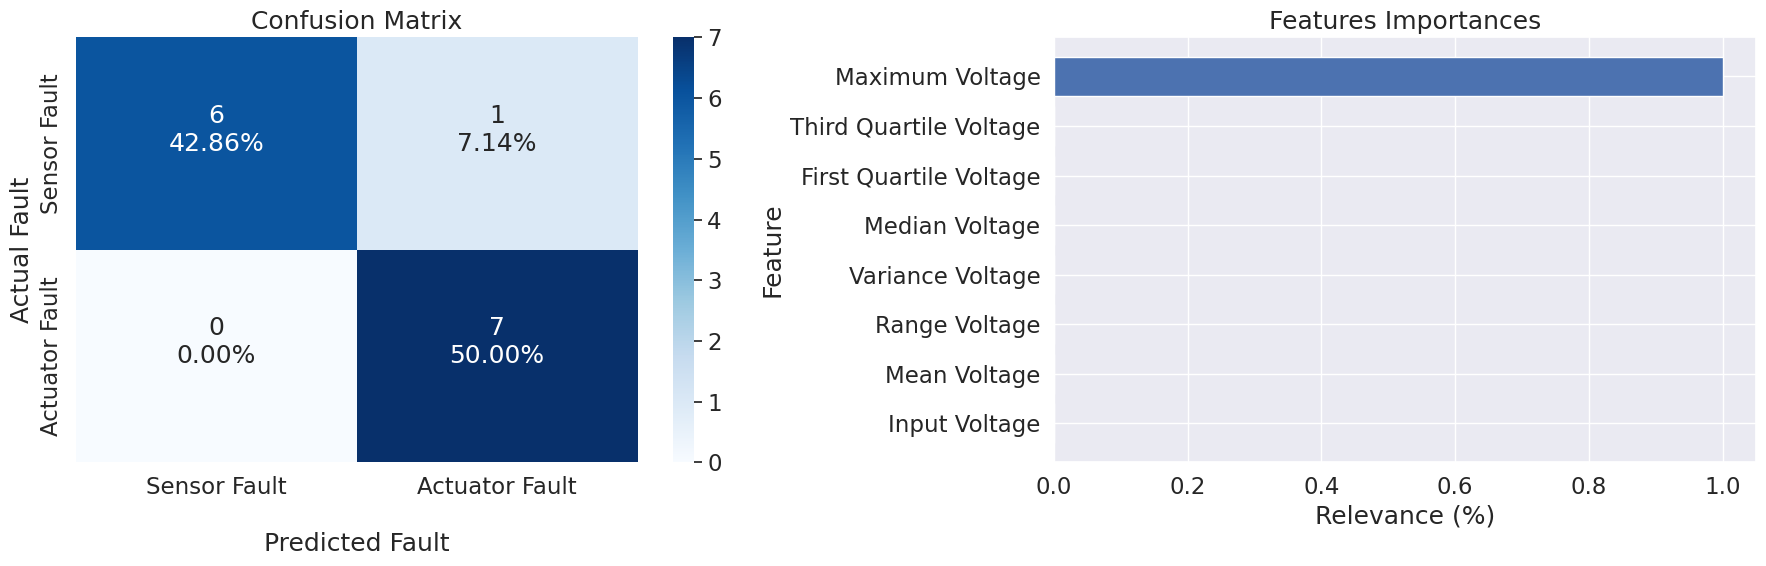

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import xgboost
from xgboost import XGBClassifier


# Set the figure size before creating subplots
plt.figure(figsize=(18, 6))

# Code for confusion matrix heatmap
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.set(font_scale=1.5)  # Adjust to fit
ax1 = plt.subplot(1, 2, 1)  # Create subplot 1
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', ax=ax1)
ax1.set_title('Confusion Matrix')
ax1.set_xlabel('\nPredicted Fault')
ax1.set_ylabel('Actual Fault')
ax1.xaxis.set_ticklabels(['Sensor Fault','Actuator Fault'])
ax1.yaxis.set_ticklabels(['Sensor Fault','Actuator Fault'])

# Code for feature importances
label_encoder = LabelEncoder()
trainLabels_encoded = label_encoder.fit_transform(trainLabels)
model = XGBClassifier()
model.fit(trainSamples, trainLabels_encoded)
features_importances = model.feature_importances_
features_dic = {
    'Input Voltage': features_importances[0],
    'Mean Voltage': features_importances[1],
    'Maximum Voltage': features_importances[2],
    'Range Voltage': features_importances[3],
    'Variance Voltage': features_importances[4],
    'Median Voltage': features_importances[5],
    'First Quartile Voltage': features_importances[6],
    'Third Quartile Voltage': features_importances[7]
}
features_dic = dict(sorted(features_dic.items(), key=lambda item: item[1], reverse=False))
names = list(features_dic.keys())
values = list(features_dic.values())
ax2 = plt.subplot(1, 2, 2)  # Create subplot 2
ax2.barh(names, values, align='center')
ax2.set_ylabel('Feature')
ax2.set_xlabel('Relevance (%)')
ax2.set_title("Features Importances")

plt.tight_layout()  # Adjust subplots to prevent overlap

# Save the figure as a PDF file
plt.savefig('fault_classifier.pdf', format='pdf')

plt.show()
